In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

In [3]:
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [4]:
x_train = df["YearsExperience"]
y_train = df["Salary"]

In [5]:
x_train

0      1.2
1      1.4
2      1.6
3      2.1
4      2.3
5      3.0
6      3.1
7      3.3
8      3.3
9      3.8
10     4.0
11     4.1
12     4.1
13     4.2
14     4.6
15     5.0
16     5.2
17     5.4
18     6.0
19     6.1
20     6.9
21     7.2
22     8.0
23     8.3
24     8.8
25     9.1
26     9.6
27     9.7
28    10.4
29    10.6
Name: YearsExperience, dtype: float64

For simple linear regression, we start with one independent variable ( x ) and one dependent variable ( y ). Our goal is to find the best-fit straight line, represented by:

[
y = mx + c
]

where ( m ) (slope) and ( c ) (intercept) are the parameters we need to learn from the data.

To determine the optimal values of ( m ) and ( c ), we follow these steps:

1. **Define a cost function** (typically Mean Squared Error) to measure how well the line fits the data.
2. **Compute the gradients** of the cost function with respect to ( m ) and ( c ).
3. **Use gradient descent** to iteratively update ( m ) and ( c ) until the cost is minimized.

---



In [6]:
def cost_function(x,y,w,b):
    m = len(x)
    total_cost = 0
    for i in range(m):
        y_pred = w*x[i]+b
        cost = (y_pred - y[i])**2
        total_cost +=cost
    return total_cost/2*m

In [7]:
def cost_gradients(x, y, w, b):
    m = len(x)
    g_w = 0
    g_b = 0
    for i in range(m):
        error = (w * x[i] + b) - y[i]
        g_w += error * x[i]
        g_b += error

    return g_w / m, g_b / m


In [8]:
def gradient_desent(x,y,l_r,epochs):
    w=0
    b=0
    for i in range(epochs):
        g_w,g_b =  cost_gradients(x,y,w,b)
        w = w-(g_w)*l_r
        b = b-(g_b)*l_r
        cost = cost_function(x,y,w,b)
    print(cost)
    return w,b
        
        

In [9]:
learning_rate = 0.001
epochs = 10000

w,b = gradient_desent(x_train,y_train,learning_rate,epochs)


14889136618.840502


In [10]:
print(w,b)

9881.634800999513 21906.99667498228


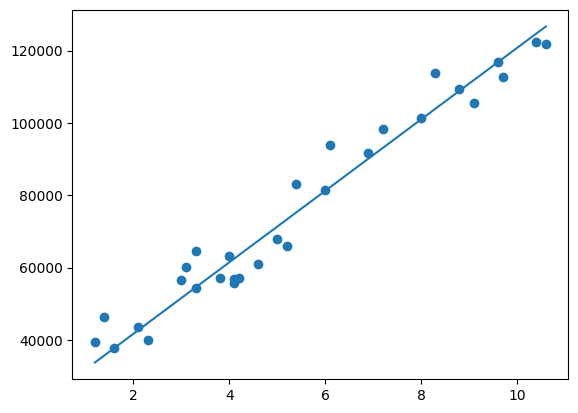

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)

y_pred = w*x_train + b

plt.plot(x_train,y_pred)